# Orlando Criminal Activities

##### Presented by: Clark Jones, Umapathy Beema, Richard Morand <br> Dr. Spencer Lyon - Spring 2024 


Objective: <br>
Each residential area are formed by many factors that constributes to its presence. From social events like volunteering bringing a positive status in the communities to criminal activities, which leads to negative insights on neighborhoods. These different actions could make or break the community. <br>


For this experiement, we will be exploring the criminal acts in Orlando, and create different models to showcase the level of danger across the city.<br>

__Tools__ <br>
Collaboration: VSCode, Github, Discord <br>
Languages: Python, Julia <br>
Packages/Libraries: Folium (OpenStreetMap), Graphs

In [2]:
# Pkg.update()
import Pkg
using Pkg


In [3]:
#import/use packages and libraries here
Pkg.add(["OpenStreetMapX","Geodesy"], io=devnull)
Pkg.add(["CSV", "DataFrames", "Conda", "PyCall", "PlotlyJS", "Plots" ], io=devnull)

# using Agents
using OpenStreetMapX, Geodesy

using CSV, DataFrames, Conda, PyCall, Statistics
using Plots, PlotlyJS


In [4]:
Conda.runconda(`install folium -c conda-forge -y`) # Folium Map
foli = pyimport("folium")

┌ Info: Running `conda install folium -c conda-forge -y` in root environment
└ @ Conda /Users/richard/.julia/packages/Conda/zReqD/src/Conda.jl:181


Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 24.9.2
  latest version: 24.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.11.0




PyObject <module 'folium' from '/Users/richard/.julia/conda/3/x86_64/lib/python3.12/site-packages/folium/__init__.py'>

In [5]:
# load and analyze data
data = CSV.read("Data/OPD_Officer-Involved_Shootings_20241125.csv", DataFrame)

first(data, 5)

Row,Case #,Date,Address,Incident Type,Number of Officers Involved,Officer Name,Officer Race,Ethnicity,Officer Gender,Officer Age,Officer Tenure,Number of Suspects Involved,Suspect Name,Suspect Race,Suspect Gender,Suspect Age,Suspect's Weapon,Suspect Hit,Fatal,Officer Hit,Fatal (Officer),Review Letter,Georeferenced Column
,String15,String15,String,String,Int64?,String?,String?,String31?,String31,String,String,Int64,String,String31,String7,String15,String31,String15,String15,String,String,String?,String
1,22-174307,05/18/2022,Mercy Drive and W.D. Judge Drive,Vehicle Stop,2,Marsy's Law Exempt,White/White,missing,"M,F",Marsy's Law Exempt,Marsy's Law Exempt,1,Carlos Delano Dafill Roberts Jr.,Black,M,29,Handgun,Yes,No,"No, No","No, No",https://www.orlando.gov/files/sharedassets/public/v/1/departments/public-safety/opd/open-data-docs/22-174307.pdf,POINT (-81.430522027 28.559823981)
2,18-448868,11/21/2018,9938 Universal Boulevard,Stolen Vehicle,1,"Chase, Alex",W,N,M,35,11,1,"Martinez Gonzalez, Joselito",White,M,30,Motor Vehicle,Yes,No,No,No,https://www1.cityoforlando.net/opendatadocs/saoletters/18-448869.pdf,POINT (-81.444407991 28.426330019)
3,18-219116,06/04/2018,4629 Cason Cove Drive,Attempted Suicide,1,"Sayer,Ryan",W,N,M,25,2,1,"White, Pamel",Black,F,63,Handgun,No,No,No,No,https://www1.cityoforlando.net/opendatadocs/saoletters/18-219116.pdf,POINT (-81.436934015 28.497201986)
4,20-397311,12/16/2020,"5434 Baldwin Park Street, Unit 101",Domestic Disturbance,1,missing,W,missing,M,40,14,1,"Robertson, Adam",White,M,34,Handgun,Yes,Yes,No,No,https://www.orlando.gov/files/sharedassets/public/departments/public-safety/opd/open-data-docs/ois_sao_zambito_ir-20-75.pdf,POINT (-81.31615297 28.574676001)
5,10-503738,10/26/2010,Hiawassee & SR 50,Armed Robbery,3,"Hinkles, Cedrick; Herb, Todd; Fischer, Bryan","B, W, W","N, N, N","M, M, M","30, 38, 37","6, 13, 4",1,"Soman, Acrifa",Black,M,21,Handgun,Yes,Yes,"No, No, No","No, No, No",http://www1.cityoforlando.net/opendatadocs/saoletters/10-503738.pdf,POINT (-81.475974825 28.552001109)


# Graph Display and Analysis



1. Group all incidents in categories: Shots, Suspicious person, vehicles, assault
2. Assign each category a color and/or icon type
3. Make Charts and Graphs with data
4. Create a Heat or Color map based on the markers
5. Maybe ad Police Stations on the map
6. Follow analysis with conclusions

#### Data Cleaning

In [6]:
# Function to convert Georeferenced Columm to Tuple 

function convert_to_tuple(str)
    test = str[7:end]
    test = strip(test, ['(', ')'])
    test = split(test, ' ')

    return (parse(Float64, test[1]), parse(Float64, test[2]))

end

convert_to_tuple (generic function with 1 method)

In [7]:
# Coorindate convertion
location = convert_to_tuple.(data[:, "Georeferenced Column"])

point = []

for each in location
    push!(point,LatLon(each[2],each[1]))
end

data[:, "Point"] = point

78-element Vector{Any}:
 LatLon(lat=28.559823981°, lon=-81.430522027°)
 LatLon(lat=28.426330019°, lon=-81.444407991°)
 LatLon(lat=28.497201986°, lon=-81.436934015°)
 LatLon(lat=28.574676001°, lon=-81.31615297°)
 LatLon(lat=28.552001109°, lon=-81.475974825°)
 LatLon(lat=28.552194982°, lon=-81.398586976°)
 LatLon(lat=28.596308986°, lon=-81.454123826°)
 LatLon(lat=28.540632985°, lon=-81.386192991°)
 LatLon(lat=28.522822186°, lon=-81.335092645°)
 LatLon(lat=28.497712989°, lon=-81.444618041°)
 ⋮
 LatLon(lat=28.544747996°, lon=-81.397620962°)
 LatLon(lat=28.529062019°, lon=-81.307727984°)
 LatLon(lat=28.538220076°, lon=-81.389041531°)
 LatLon(lat=28.611062074°, lon=-81.429694969°)
 LatLon(lat=28.490099922°, lon=-81.462643153°)
 LatLon(lat=28.420598013°, lon=-81.269478007°)
 LatLon(lat=28.518123007°, lon=-81.306244974°)
 LatLon(lat=28.534726006°, lon=-81.388922977°)
 LatLon(lat=28.601738987°, lon=-81.413406013°)

#### Statistical Analysis

In [8]:
size(data)

(78, 24)

In [9]:
suspects_weapon_cnt = combine(groupby(data,:"Suspect's Weapon"),nrow => :count)

Row,Suspect's Weapon,count
,String31,Int64
1,Handgun,40
2,Motor Vehicle,15
3,Hands/ASP,1
4,Knife,2
5,No,3
6,"Firearm, Firearm, Unknown",1
7,"Handgun, None",1
8,Yes,1
9,Firearm,4


In [10]:
incident_freq = combine(groupby(data, "Incident Type"), nrow => :Count)
sort!(incident_freq, :Count, rev=true)

Row,Incident Type,Count
,String,Int64
1,Traffic Stop,7
2,Suspicious Person,6
3,Armed Robbery,5
4,Stolen Vehicle,4
5,Attempted Suicide,4
6,Armed Subject,4
7,Battery,3
8,Shots fired,3
9,Domestic Disturbance,2


In [11]:
#function to classify Incident type broadly into 3 different categories i.e. Burglary, Battery and Vehicle Motor
function Classify_Inc_ty(IncType)
    if occursin("Vehicle",IncType) || occursin("Traffic",IncType) || occursin("Street",IncType)
        return "Vehicle"
    elseif occursin("Suspicious ",IncType) || occursin("Being",IncType) || occursin("Suicide",IncType) ||
           occursin("Ill",IncType) || occursin("Stalk",IncType) 
        return "Suspicious"
    elseif occursin("Battery",IncType) || occursin("Assault",IncType) || occursin("Domestic", IncType)
        return "Assault"
    elseif occursin("Sho",IncType) || occursin("Armed",IncType) || occursin("fire",IncType) || occursin("Homicide",IncType) || 
           occursin("Robbery",IncType) || occursin("Burglary",IncType)  || occursin("Carjack",IncType) || occursin("Murder",IncType) 
        return "Shots"
    else
        return "Other"
    end
end

Classify_Inc_ty (generic function with 1 method)

In [12]:
data.Incident_Type = Classify_Inc_ty.(data."Incident Type")

#Incident Type frequency 
Inc_cat_cnt = combine(groupby(data,:"Incident_Type"),nrow => :count)
sort(Inc_cat_cnt,:count,rev=true)

Row,Incident_Type,count
,String,Int64
1,Shots,24
2,Vehicle,18
3,Suspicious,18
4,Assault,9
5,Other,9


In [13]:
# Reference Check...
# df = combine(data, [:"Incident Type", :"Incident_Type"])
# # data[!,"Incident_Type"]

# for (idx,each) in enumerate(df.Incident_Type)
#     # get!(df, each),
#     if each == "Other"
#         println(df[!,"Incident Type"][idx], " | ",each)
#     end
# end



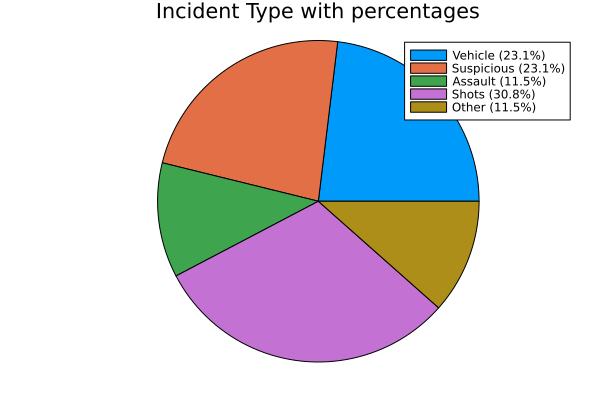

In [15]:
#Showing pie chart and percentages of Incident types classifying 3 different categories

total = sum(Inc_cat_cnt.count)
Inc_cat_cnt.Percent = round.(Inc_cat_cnt.count ./total .* 100,digits = 1)
labels = ["$(Inc_cat_cnt.Incident_Type[i]) ($(round(Inc_cat_cnt.Percent[i],digits = 1))%)" for i in 1:nrow(Inc_cat_cnt)]
# P = Plots.pie(x,y,l=1.5)
# P
PiePer = Plots.pie(labels,Inc_cat_cnt.count,title = "Incident Type with percentages")
PiePer

In [16]:
#Define a function to classify Suspect's weapons type used into 3 categoreis Gun,Motor Vehicle and No arms.
function classify_weapon(weapon)
    if occursin("gun",weapon) || occursin("Firearm",weapon) || occursin("Knife",weapon) 
        return "Gun"
    elseif occursin("Vehicle",weapon)
        return "Motor Vehicle"
    else
        return "No arms"
    end
end

classify_weapon (generic function with 1 method)

In [17]:
#Apply function classify_weapon to dataframe data and store in new column weap_categoryN
data.weap_categoryN = classify_weapon.(data."Suspect's Weapon" )
#Find the frequency count of three different categories of Suspect's weapons type used.
susp_weap_catN_cnt = combine(groupby(data,:"weap_categoryN"),nrow => :count)

Row,weap_categoryN,count
,String,Int64
1,Gun,53
2,Motor Vehicle,15
3,No arms,10


### Map Model

In [19]:

# Initialize map

lats = [x[2] for x in location]
lons = [x[1] for x in location]

# Map Limits
min_lat = minimum(lats) 
max_lat = maximum(lats) 
min_lon = minimum(lons) 
max_lon = maximum(lons)


map = foli.Map(
    max_bounds= true,
    location = [28.601, -81.429],
    min_lat = min_lat,
    max_lat = max_lat,
    min_lon = min_lon,
    max_lon = max_lon,
    )

# Bounds Check
# foli.CircleMarker([max_lat, min_lon], tooltip="Upper Left Corner").add_to(map)
# foli.CircleMarker([min_lat, min_lon], tooltip="Lower Left Corner").add_to(map)
# foli.CircleMarker([min_lat, max_lon], tooltip="Lower Right Corner").add_to(map)
# foli.CircleMarker([max_lat, max_lon], tooltip="Upper Right Corner").add_to(map)



categories = Dict(
    "Shots" => ("red", "white", "gun"),
    "Suspicious" => ("white", "black", "user-secret"),
    "Vehicle" => ("green", "white", "car"),
    "Assault" => ("orange", "white", "people-robbery")
)

function categorize_incident(incident_type::String)
    for category in keys(categories)
        if occursin(category, incident_type)
            return categories[category]
        end
    end
    return ("gray", "white", "circle-info")  
end



# Add Crimes Markers 

for (idx,each) in enumerate(data.Point)
    color,icon_color,icon_type = categorize_incident(data[!,"Incident_Type"][idx])

    foli.Marker(

       


        location=[each.lat, each.lon],  # Access latitude and longitude using .lat and .lon
        tooltip= data[!,"Incident Type"][idx],
        popup="Case #: $(data[!,"Case #"][idx])\n
               Suspect's Weapon: $(data[!,"Suspect's Weapon"][idx])
              ",

        # icon=foli.Icon(color="darkblue", icon="building-shield", prefix="fa")
        icon=foli.Icon(color= color, icon_color=icon_color, icon=icon_type, prefix="fa")

    ).add_to(map)
end

map



PyObject <folium.folium.Map object at 0x161968f50>

### Visualizations
Interactive Map of Crime Locations
An interactive map was created to display crime locations, with incidents marked using category-specific colored icons. Each marker includes a tooltip showing details such as incident type, suspect weapon, and case number. Categories like "Shots" are represented by red gun icons, while "Suspicious" incidents are marked with a white-and-black user-secret icon. Vehicle-related crimes use a green car icon, and assault-related incidents are denoted by an orange robbery icon.

In [20]:
# Police Stations in Orlando with heat map

HeatMap = pyimport("folium.plugins").HeatMap

locations = [[each.lat, each.lon] for each in point]  

avg_lat = mean([loc[1] for loc in locations])
avg_lon = mean([loc[2] for loc in locations])
m = foli.Map(location=[avg_lat, avg_lon], zoom_start=12)

HeatMap(locations).add_to(m)

police_stations = [
    (28.5402, -81.3807, "Orlando Police Headquarters"),
    (28.5243, -81.4603, "District 2 Office"),
    (28.5463, -81.4632, "District 3 Office"),
    (28.4752, -81.3370, "Airport Division"),
    (28.6111, -81.4488, "Northwest Community Police Office"),
    (28.4238, -81.4341, "Southwest Community Police Office")         
]

for (lat, lon, name) in police_stations
    foli.Marker(
        location=[lat, lon],
        tooltip="Police Station",
        popup="<b>$name</b>",
        # icon=foli.Icon(color="darkblue", icon="shield", icon_size=(40, 40))
        icon=foli.Icon(color="darkblue", icon="building-shield", prefix="fa")
    ).add_to(m)
end
m



PyObject <folium.folium.Map object at 0x16118ddf0>

### Heatmap of Crime Hotspots
To identify areas with high crime density, a heatmap overlay was added to the map. This visualization highlights regions requiring increased law enforcement presence. The heatmap was implemented using Folium's HeatMap plugin and overlays the crime density on the city's map.

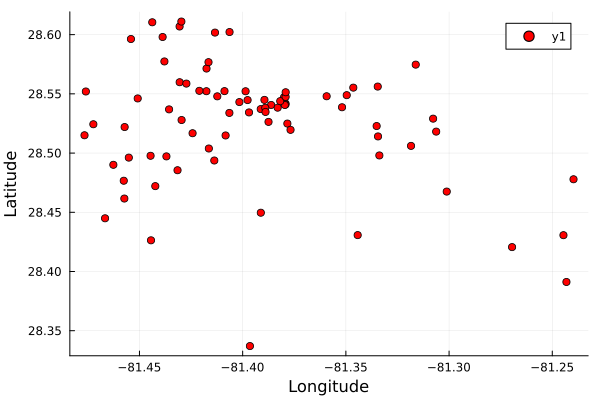

In [ ]:
# location

Plots.plot(location,
            proj=:merc,  # Mercator projection

            aspect=:equal, 

            xlabel="Longitude", 

ylabel="Latitude", 

color=:red, 

mkrsize=5,
seriestype=:scatter

)

### Graph Model

## Conclusion

---

### Patterns Observed

- Incidents involving gunshots are predominantly concentrated in downtown Orlando, suggesting a link between high-activity zones and violent crimes.  
- Reports of suspicious persons are distributed across residential areas, raising concerns about community safety in these neighborhoods.  
- Vehicle-related incidents occur frequently in commercial zones, likely due to increased traffic and congestion in these areas.  
- Assaults show a mixed pattern, occurring both in central areas and certain residential pockets.  

---

### Insights

- The concentration of gunshots downtown highlights the need for focused **law enforcement presence** during peak hours and in high-traffic areas.  
- The distribution of suspicious person incidents indicates potential vulnerabilities in residential areas, which could benefit from community-based policing.  
- Frequent vehicle-related crimes in commercial zones emphasize the importance of patrolling parking lots and heavily trafficked streets.  

---

### Recommendations

1. Increase police presence in downtown Orlando during high-traffic periods to address violent crimes effectively.  
2. Establish neighborhood watch programs and deploy community officers to residential areas to enhance safety and foster trust.  
3. Implement targeted patrols in commercial zones to deter vehicle-related crimes and provide a safer environment for businesses and visitors.  

---

By focusing resources on identified crime hotspots and addressing specific patterns, law enforcement can take proactive measures to reduce criminal activities and enhance public safety across Orlando.

#### References: <br>
[OPD Officer-Involded Shootings](https://data.cityoforlando.net/Orlando-Police/OPD-Officer-Involved-Shootings/6kz6-6c7n/data_preview) <br>
[Folium](https://python-visualization.github.io/folium/latest/user_guide/plugins/grouped_layer_control.html) <br>